<a href="https://colab.research.google.com/github/Harsh-58/DataScienceA2/blob/main/HarsJainU3proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
  !pip install preliz
  import preliz as pz
  import numpy as np
  import matplotlib.pyplot as plt
  import pandas as pd
  import arviz as az
  import pymc as pm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.9/509.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 11.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osqp 0.6.7.post0 requires scipy!=1.12.0,>=0.13.2, but you have scipy 1.12.0 which is incompatible.


## **Modeling the amount of goals scored by each top scorer of the Premier League from the 92/93 season to the 23/24 season (past 32 seasons)**

In [2]:
goals= [
    22,34,34,31,25,18,36,30,23,24,25,30,25,27,20,31,19,29,20,30,26,31,26,25,29,32,22,23,23,23,36,27
]

List of goals scored by the top scorer from each season, now I'm going to plot the data.

(array([2., 2., 6., 5., 2., 2., 5., 4., 2., 2.]),
 array([18. , 19.8, 21.6, 23.4, 25.2, 27. , 28.8, 30.6, 32.4, 34.2, 36. ]),
 <BarContainer object of 10 artists>)

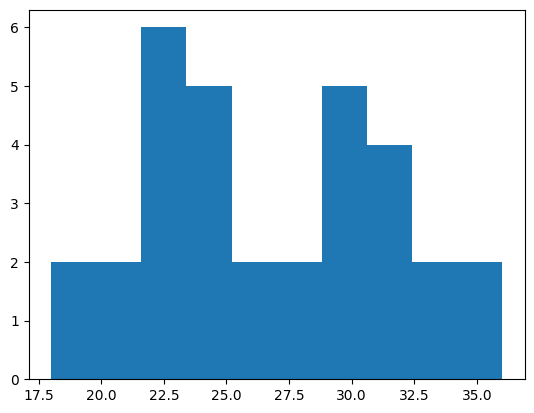

In [3]:
plt.hist(goals)

The mean looks close to 25 or 26 and the standard deviation looks close to 5. The graph has 2 peaks so it's similar to a bimodial distribution, I'm interested to see how it looks in the model.

For the mean and standard deviation, I started with uniform and half normal priors, respectively. Since the standard deviation will only contain positive values with a greater weight given to smaller values. The model probably isn't going to look accurate.

In [4]:
with pm.Model() as model_top:
    # normal distribution for the mean
    μ = pm.Uniform('μ', lower=17, upper=36)

    #half normal distribution for standard deviation because the standard deviation is all positive and heavier near lower values
    σ = pm.HalfNormal('σ', sigma=5)

    #likelihood
    Y = pm.Normal('Y', mu = μ, sigma = σ, observed=goals)
    idata = pm.sample()

Output()

Output()

Output()

<Axes: xlabel='Y'>

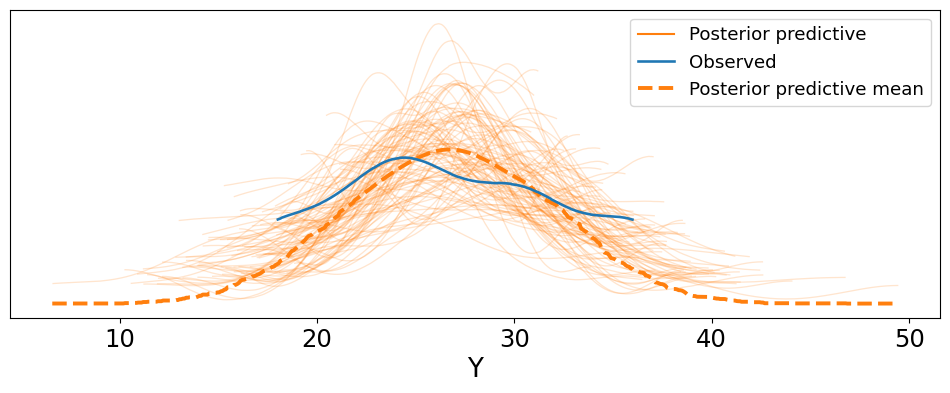

In [5]:
pm.sample_posterior_predictive(idata, model=model, extend_inferencedata=True)
az.plot_ppc(idata, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

This model doesn't fit and the confidence is low since the orange lines are far from the model. I'll use a normal prior for the next graph.

In [6]:
#ST is for skew T
with pm.Model() as model_top2:
    #normal distribution for the mean
    μ = pm.Normal('μ', mu=25, sigma=5)

    #half normal distribution for standard deviation because the standard deviation is all positive and heavier near lower values
    σ = pm.HalfNormal('σ', sigma=5)

    #when a is larger than b, the dist. is positively skewed, when a is less its negative
    a = pm.HalfNormal('a', sigma=1)
    b = pm.HalfNormal('b', sigma=5)

    #SkewStudentT liklihood
    y = pm.SkewStudentT('y',mu=μ, sigma=σ, a = a, b = b, observed=goals)
    idataST = pm.sample()

Output()

Output()

Output()

(15.0, 38.0)

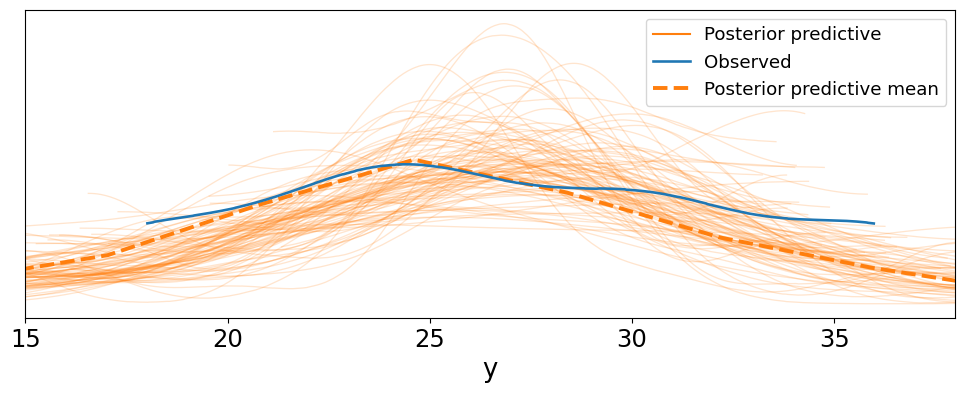

In [7]:
pm.sample_posterior_predictive(idataST, model=model_top2, extend_inferencedata=True)
ax = az.plot_ppc(idataST, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])
ax.set_xlim(15,38) #limiting the frame so it's easier to see

This graph is actually a great fit but I want to try a couple more parameters to see how it affects the graph. This might be my closest model.

In [16]:
#ST is for skew T
with pm.Model() as model_top3:
    #normal distribution for the mean
    μ = pm.Normal('μ', mu=25, sigma=5)

    #half normal distribution for standard deviation because the standard deviation is all positive and heavier near lower values
    σ = pm.HalfNormal('σ', sigma=10)

    #when a is larger than b, the dist. is positively skewed, when a is less its negative
    a = pm.HalfNormal('a', sigma=1)
    b = pm.HalfNormal('b', sigma=5)

    #SkewStudentT liklihood
    y = pm.SkewStudentT('y',mu=μ, sigma=σ, a = a, b = b, observed=goals)
    idataST = pm.sample()

Output()

Output()

Output()

(15.0, 38.0)

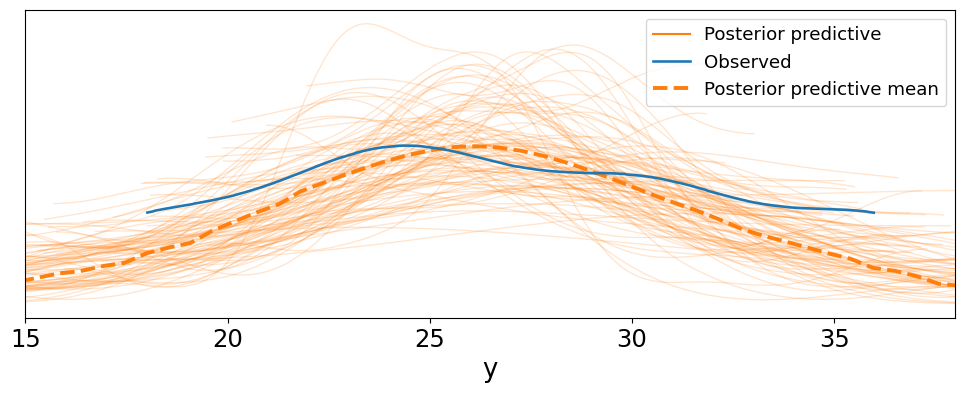

In [17]:
pm.sample_posterior_predictive(idataST, model=model_top3, extend_inferencedata=True)
ax = az.plot_ppc(idataST, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])
ax.set_xlim(15,38) #limiting the frame so it's easier to see

I only changed the standard deviation to 10 to try to make the model flatter but it still looks kind of off. I'm going to try to move it to the left by increasing the b value and the sigma value.

In [40]:
#ST is for skew T
with pm.Model() as model_top4:
    #normal distribution for the mean
    μ = pm.Normal('μ', mu=18, sigma=5)

    #half normal distribution for standard deviation because the standard deviation is all positive and heavier near lower values
    σ = pm.HalfNormal('σ', sigma=22)

    #when a is larger than b, the dist. is positively skewed, when a is less its negative
    a = pm.HalfNormal('a', sigma=1)
    b = pm.HalfNormal('b', sigma=10)

    #SkewStudentT liklihood
    y = pm.SkewStudentT('y',mu=μ, sigma=σ, a = a, b = b, observed=goals)
    idataST = pm.sample()

Output()

Output()

Output()

(15.0, 38.0)

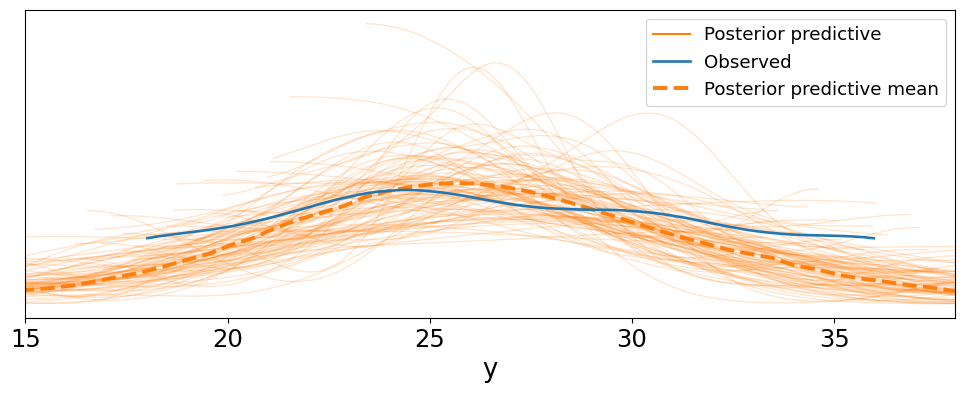

In [41]:
pm.sample_posterior_predictive(idataST, model=model_top4, extend_inferencedata=True)
ax = az.plot_ppc(idataST, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])
ax.set_xlim(15,38) #limiting the frame so it's easier to see

The Posterior Predictive Checks are pretty dense around the actual data (blue line) and the model is very close to fitting the data. But honestly, I believe that model_top2 is better since I used some weird parameters for the latest model. They are both very close to modeling the data from what I see. The graphs show lower predicted values on the higher end but that makes sense since there were a couple of high goal count outliers.

Conclusion: My model for this data captures the typical goal count of Premier League top scorers, showing a tendency of around 26 goals with slight variability across seasons. It also highlights occasional standout seasons with significantly higher goal counts, such as Haaland's 36 goal season (22/23) and Salah's 32 goal season (17/18), while predicting future performances that align with past trends. This model provides good insight into what we can expect of top scorers’ goal counts over the years.